# Dataset Draft

Dennis Chan 15833526 

Stanley Si Lin Wu 15417190 

Michael Dong 15804232 

Sander Neele 15857719 

Groep nummer: B1 (#1) 

# Titel
Factoren die mensen zijn voorkeur voor films of series beïnvloeden

# Beschrijving

IMDb is de bekendste website voor het beoordelen van films en series en er bestaat duidelijke tegenstellingen tussen films en series. Sommige mensen vinden films beter, terwijl sommige juist series beter vinden. Maar welke factoren bepalen dan deze voorkeuren? In dit project gaan we dus de data analyseren om te bepalen wat precies deze verschillen veroorzaakt. Sommigen vinden series leuker vanwege de grote hoeveelheid detail en zij liever thuis kijken, terwijl anderen films waarderen omdat ze een compleet verhaal in korte tijd vertellen en liever in de bioscoop kijken.  

In [2]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Perspectief 1

Movies is een behoefte door hun korte tijdsduur en snelle inspanning en eenmalige beleving. Terwijl series beter zijn omdat ze betere karakterontwikkeling over langere periode. Daarnaast past thuiskijken beter bij moderne levenstijl.  


# Perspectief 2

Moderne films en series hebben betere technologieën zoals CGI en de hogere productiebudget, waardoor ze dus visueel er beter uit zien. Aan de andere kant hebben we oude klassieke films die vaak meer echte verhalen hebben zonder te veel computer trucjes. Hierdoor moesten de acteurs juist goed acteren. Daarom kijken mensen deze films nog steeds deze klassiekers.  


# Dataset 1: IMDB Top 1000 Movies

https://www.kaggle.com/datasets/octopusteam/imdb-top-1000-movies 

Hoeveelheid datapunten: 1000 records
 
Hoeveelheid variabelen in de dataset: 6 variabelen 

De database bevat de top 1000 best beoordeelde films op IMDb, elk met minstens 10.000 ratings. Voor elke film is de titel, genre, aantal votes, rating en de releasedatum genoteerd. Deze gegevens zijn verkregen via een (onofficiële) IMDb API en kunnen inzicht geven in trends en voorkeuren van gebruikers. 

In [3]:
data = pd.read_csv('movies.csv')
data.head(n=10)


,id,title,genres,averageRating,numVotes,releaseYear
0,tt0111161,The Shawshank Redemption,Drama,9.3,3057007,1994
1,tt0068646,The Godfather,"Crime, Drama",9.2,2134065,1972
2,tt0252487,The Chaos Class,Comedy,9.2,44602,1975
3,tt33175825,Attack on Titan the Movie: The Last Attack,"Action, Adventure, Animation",9.2,17305,2024
4,tt0259534,Ramayana: The Legend of Prince Rama,"Action, Adventure, Animation",9.1,16474,1993
5,tt0468569,The Dark Knight,"Action, Crime, Drama",9.0,3031913,2008
6,tt0167260,The Lord of the Rings: The Return of the King,"Adventure, Drama, Fantasy",9.0,2085825,2003
7,tt0108052,Schindler's List,"Biography, Drama, History",9.0,1529796,1993
8,tt0071562,The Godfather Part II,"Crime, Drama",9.0,1435894,1974
9,tt0050083,12 Angry Men,"Crime, Drama",9.0,931547,1957


# Dataset 2: IMBD Top 1000 Series


https://www.kaggle.com/datasets/octopusteam/imdb-top-1000-tv-series 

Hoeveelheid datapunten: 1000 records 

Hoeveelheid variabelen in de dataset: 6 variabelen


De database bevat een top 1000 top rated TV series in IMDb met minstens 10000 ratings. Daarin staat de titel, genre, aantal votes, rating en de releasedatum van de film. De data is verkregen door middel van een (Onofficieel) IMDb API, te vinden op RapidAPI. 


In [4]:
data = pd.read_csv('tvseries.csv')
data.head(n=10)

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2341969,2008
1,tt0185906,Band of Brothers,"Action, Drama, History",9.4,564041,2001
2,tt0795176,Planet Earth,"Documentary, Family",9.4,227819,2006
3,tt5491994,Planet Earth II,Documentary,9.4,166992,2016
4,tt5152226,Tree of Life,Drama,9.4,18826,2014
5,tt7366338,Chernobyl,"Drama, History, Thriller",9.3,954055,2019
6,tt0417299,Avatar: The Last Airbender,"Action, Adventure, Animation",9.3,408049,2005
7,tt0306414,The Wire,"Crime, Drama, Thriller",9.3,404808,2002
8,tt30263074,Sapne Vs Everyone,Drama,9.3,73898,2023
9,tt6769208,Blue Planet II,Documentary,9.3,52095,2017


In [5]:
# Laad beide CSV-bestanden
df1 = pd.read_csv("movies.csv")  # Hier zit bijvoorbeeld 'Country' in
df2 = pd.read_csv("tvseries.csv")  # Hier zit 'Location' i.p.v. 'Country' in

# 2. Voeg een 'type' kolom toe om films/series te onderscheiden
df1["type"] = "film"
df2["type"] = "serie"

# 3. Voeg beide DataFrames samen
combined = pd.concat([df1, df2])

# 4. Groepeer per releaseYear en tel votes op
result = (
    combined.groupby("releaseYear", as_index=False)
    .agg({
        "numVotes": "sum",  # Tel alle votes op per jaar
        "title": lambda x: " | ".join(x),  # Combineer titels met scheidingsteken
        "type": lambda x: " + ".join(x)    # Combineer types (film + serie)
    })
    .rename(columns={"title": "titles_combined"})  # Hernoem voor duidelijkheid
)

# 5. Sla het resultaat op (optioneel)
result.to_csv("combined_votes_by_year.csv", index=True)

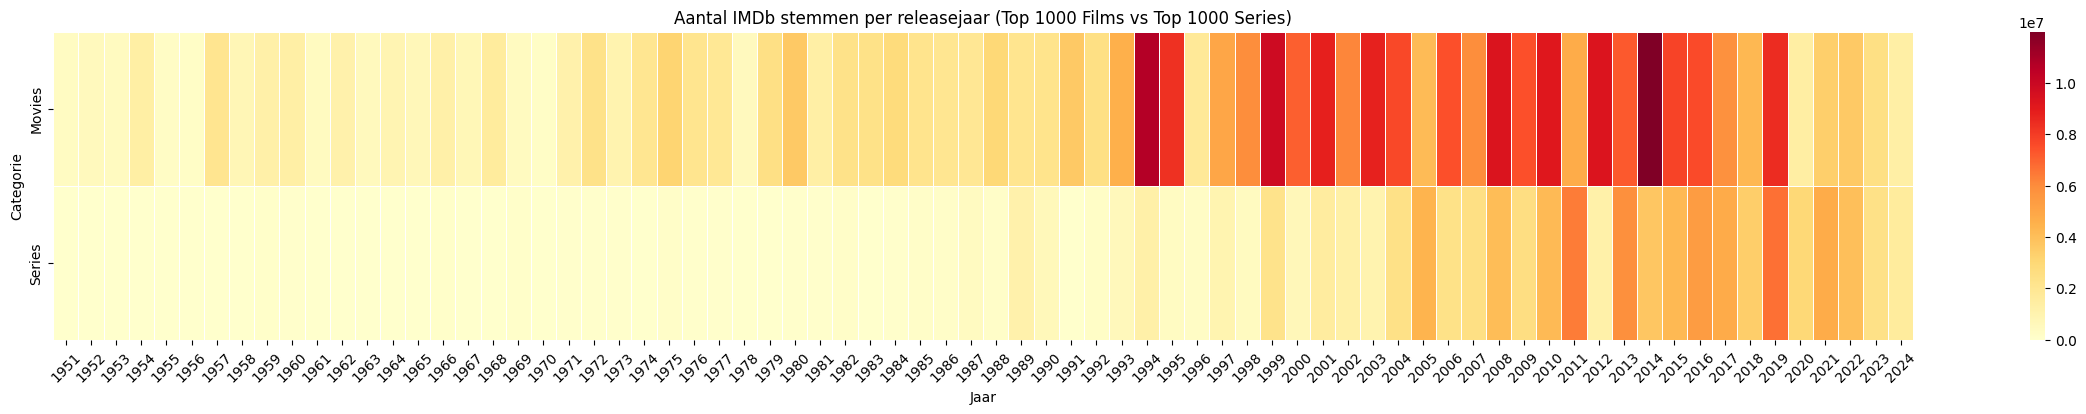

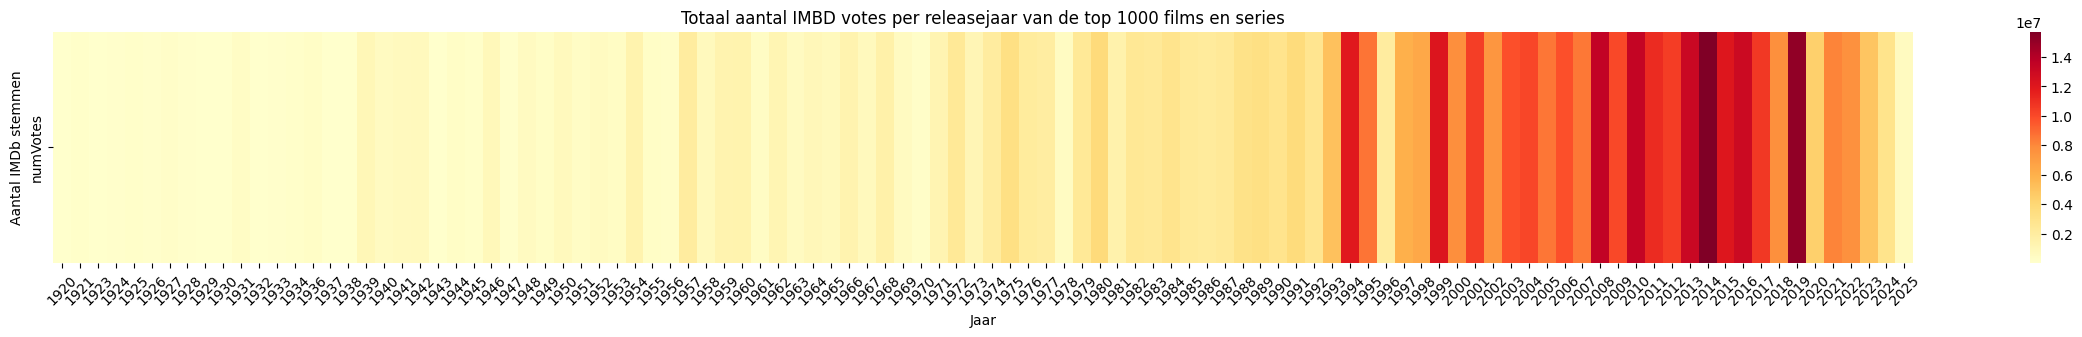

In [21]:

############# FILMS + SERIES APART######################### 



# --- Movies ---
movies_df = pd.read_csv("movies.csv")
movies_votes = movies_df.groupby('releaseYear')['numVotes'].sum().reindex(range(1951, 2025)).fillna(0)
movies_votes.name = 'Movies'

# --- Series ---
series_df = pd.read_csv("tvseries.csv")
series_votes = series_df.groupby('releaseYear')['numVotes'].sum().reindex(range(1951, 2025)).fillna(0)
series_votes.name = 'Series'

# Combine into one DataFrame for heatmap (rows = categorieën, columns = jaren)
heatmap_df = pd.concat([movies_votes, series_votes], axis=1).T

# --- Plot ---
plt.figure(figsize=(30, 4))
sns.heatmap(
    heatmap_df,
    cmap='YlOrRd',
    cbar=True,
    xticklabels=range(1951, 2025),
    linewidths=0.5,       # <-- hier komt de lijn
    linecolor='white'     # <-- witte lijnen
)
plt.title('Aantal IMDb stemmen per releasejaar (Top 1000 Films vs Top 1000 Series)')
plt.xlabel('Jaar')
plt.ylabel('Categorie')
plt.xticks(rotation=45)
plt.show()




#################### gecombineerd TVSeries en Films top 1000 ################

df = pd.read_csv("combined_votes_by_year.csv")

#voeg het totale aantal votes per jaar
votes_per_year = df.groupby('releaseYear')['numVotes'].sum().reset_index()

#lijst van alle jaren in de dataset
all_years = sorted(df['releaseYear'].unique())  # Sorteer de jaren

#Zorg dat de heatmap-data alle jaren bevat (zelfs als sommige geen votes hebben)
heatmap_data = votes_per_year.set_index('releaseYear').reindex(all_years).T.fillna(0)


plt.figure(figsize=(30, 3))
sns.heatmap(heatmap_data, fmt='.1f', cmap='YlOrRd', cbar=True, xticklabels=all_years)
plt.title('Totaal aantal IMBD votes per releasejaar van de top 1000 films en series')
plt.xlabel('Jaar')
plt.ylabel('Aantal IMDb stemmen')
plt.xticks(rotation=45)
plt.show()

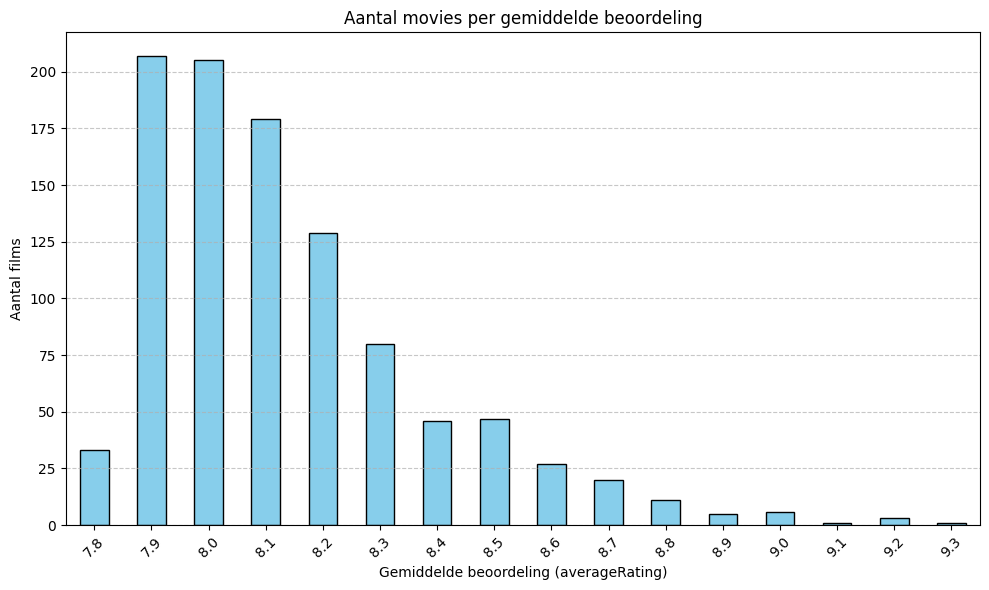

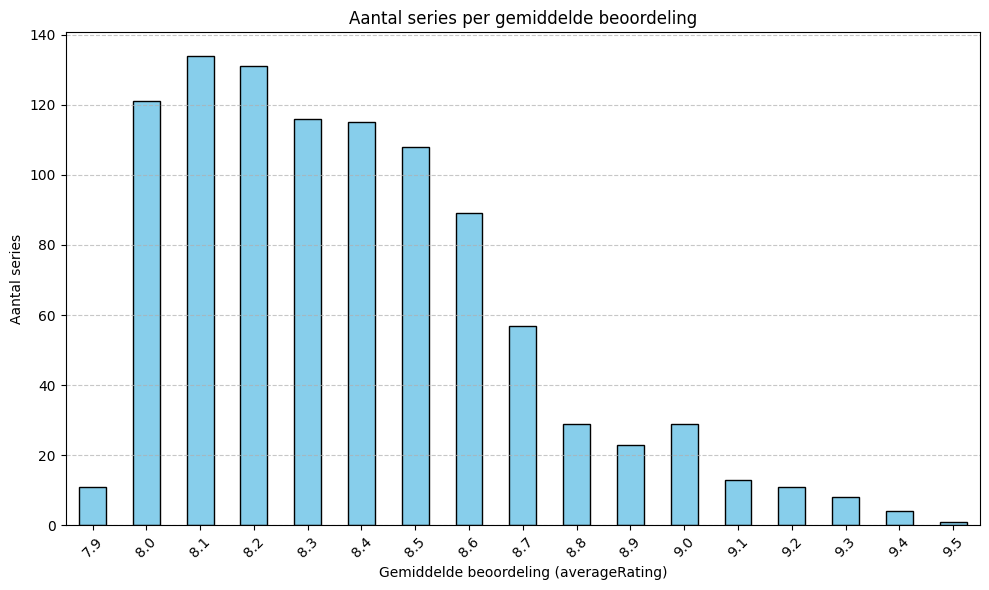

In [7]:
# 1. CSV inlezen
df = pd.read_csv("movies.csv")
    
# 2. Groeperen op gemiddelde beoordeling
rating_counts = df.groupby("averageRating").size()  # telt aantal films per rating

# 3. Plotten
plt.figure(figsize=(10, 6))
rating_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Aantal movies per gemiddelde beoordeling")
plt.xlabel("Gemiddelde beoordeling (averageRating)")
plt.ylabel("Aantal films")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# 1. CSV inlezen
df = pd.read_csv("tvseries.csv")

# 2. Groeperen op gemiddelde beoordeling
rating_counts = df.groupby("averageRating").size()  # telt aantal films per rating

# 3. Plotten
plt.figure(figsize=(10, 6))
rating_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Aantal series per gemiddelde beoordeling")
plt.xlabel("Gemiddelde beoordeling (averageRating)")
plt.ylabel("Aantal series")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

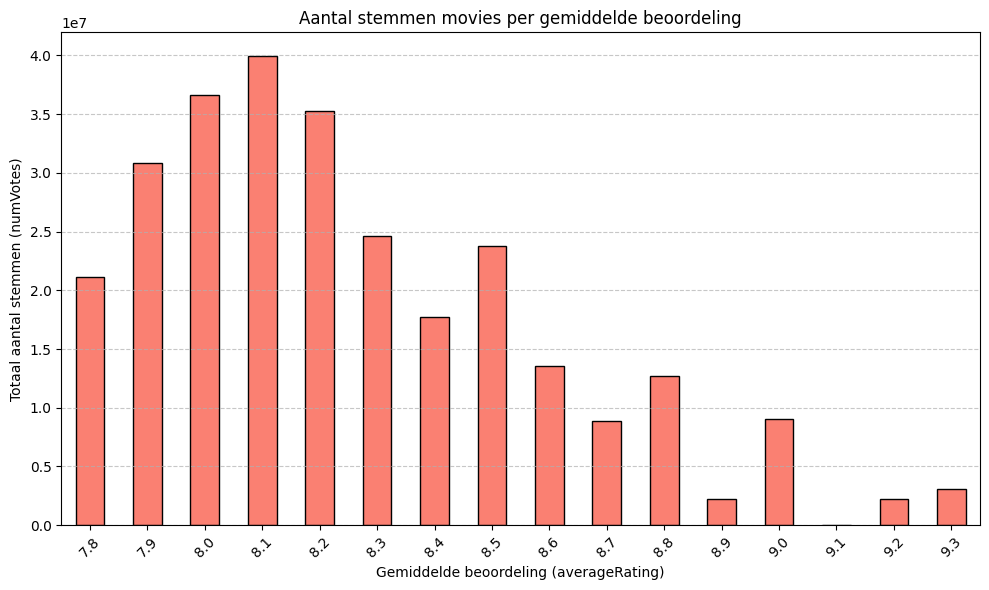

In [8]:
# 1. CSV inlezen
df = pd.read_csv("movies.csv")

# 2. Groepeer: som van stemmen per gemiddelde beoordeling
rating_votes = df.groupby("averageRating")["numVotes"].sum()

# 3. Plotten
plt.figure(figsize=(10, 6))
rating_votes.plot(kind="bar", color="salmon", edgecolor="black")

plt.title("Aantal stemmen movies per gemiddelde beoordeling")
plt.xlabel("Gemiddelde beoordeling (averageRating)")
plt.ylabel("Totaal aantal stemmen (numVotes)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


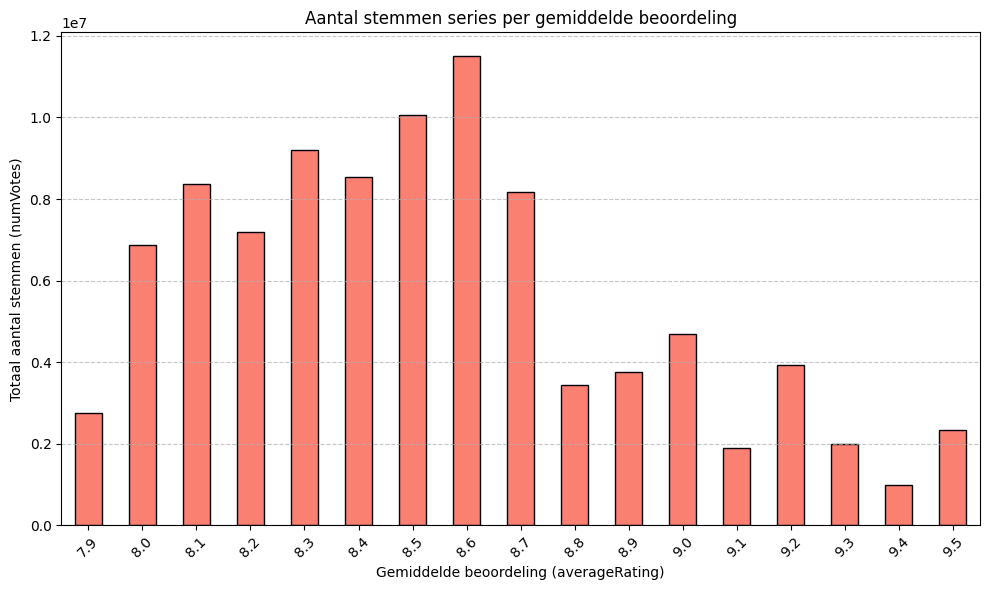

In [9]:
# 1. CSV inlezen
df = pd.read_csv("tvseries.csv")

# 2. Groepeer: som van stemmen per gemiddelde beoordeling
rating_votes = df.groupby("averageRating")["numVotes"].sum()

# 3. Plotten
plt.figure(figsize=(10, 6))
rating_votes.plot(kind="bar", color="salmon", edgecolor="black")

plt.title("Aantal stemmen series per gemiddelde beoordeling")
plt.xlabel("Gemiddelde beoordeling (averageRating)")
plt.ylabel("Totaal aantal stemmen (numVotes)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [51]:
df = pd.read_csv("movies.csv")

#Splits genres in aparte rijen (één genre per rij)
df = df.assign(genres=df["genres"].str.split(",")).explode("genres")

df["genres"] = df["genres"].str.strip()
# Bereken gemiddelde rating en som van votes per genre
genre_stats = df.groupby("genres").agg(
    averageRating=("averageRating", "mean"),
    numMovies=("title", "count"),  # Aantal films per genre
).reset_index()

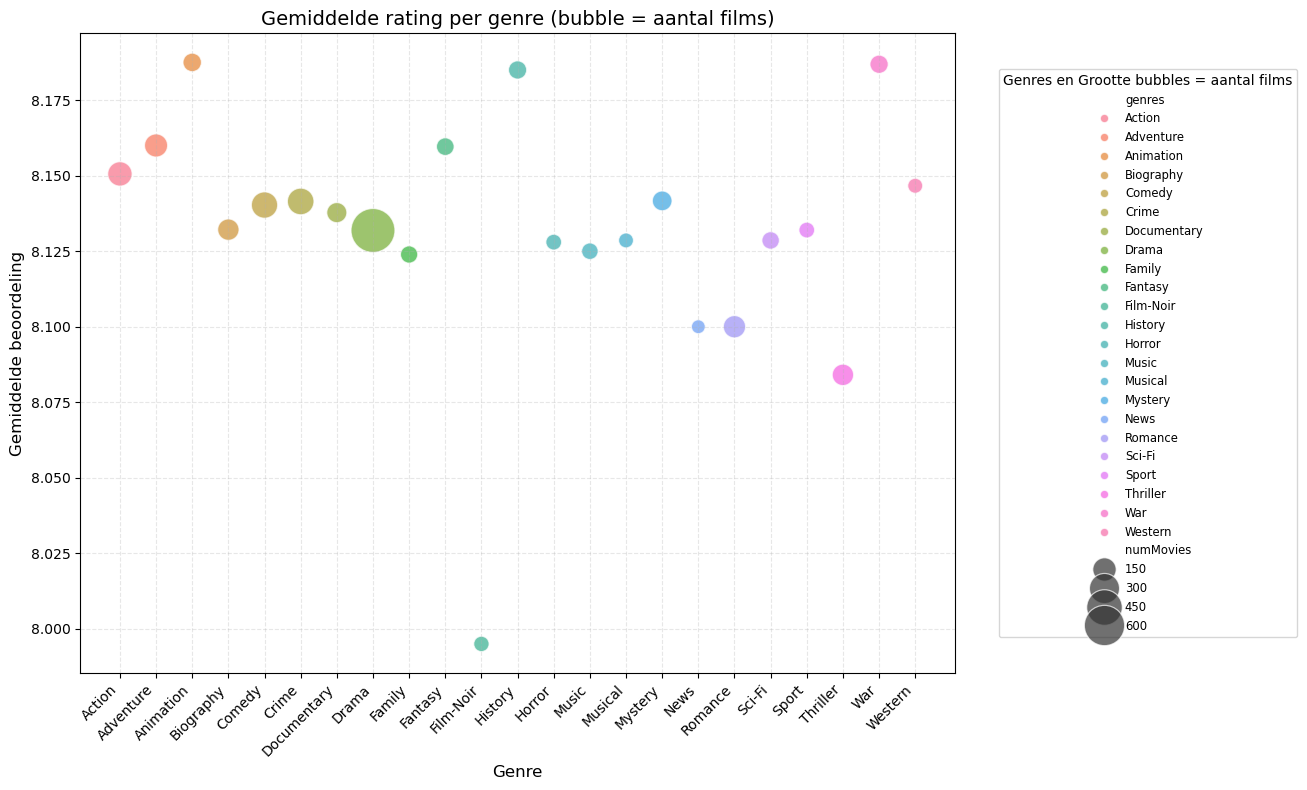

In [52]:
plt.figure(figsize=(12, 8))

# Bubble chart met seaborn
sns.scatterplot(
    data=genre_stats,
    x="genres",
    y="averageRating",
    size="numMovies",      # Bubble-grootte = aantal films
    sizes=(100, 1000),     # Min/max bubble-grootte (pas aan)
    hue="genres",          # Kleur op genre (optioneel)
    alpha=0.7,             # Doorzichtigheid
    legend="brief",         # Toon legenda    
)

plt.title("Gemiddelde rating per genre (bubble = aantal films)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Gemiddelde beoordeling", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Draai genre-labels voor leesbaarheid


plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.grid(axis="x", linestyle="--", alpha=0.3)


plt.legend(
    bbox_to_anchor=(1.05, 0.5),   # Rechts van het plot
    loc='center left',
    borderaxespad=0,
    title="Genres en " \
    "Grootte bubbles = aantal films",
    fontsize='small',
    title_fontsize='medium'
)


plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Zorg dat er ruimte is voor de legenda
plt.show()

In [53]:
df = pd.read_csv("tvseries.csv")

#Splits genres in aparte rijen (één genre per rij)
df = df.assign(genres=df["genres"].str.split(",")).explode("genres")

df["genres"] = df["genres"].str.strip()
# Bereken gemiddelde rating en som van votes per genre
genre_stats = df.groupby("genres").agg(
    averageRating=("averageRating", "mean"),
    numSeries=("title", "count"),  # Aantal films per genre
).reset_index()

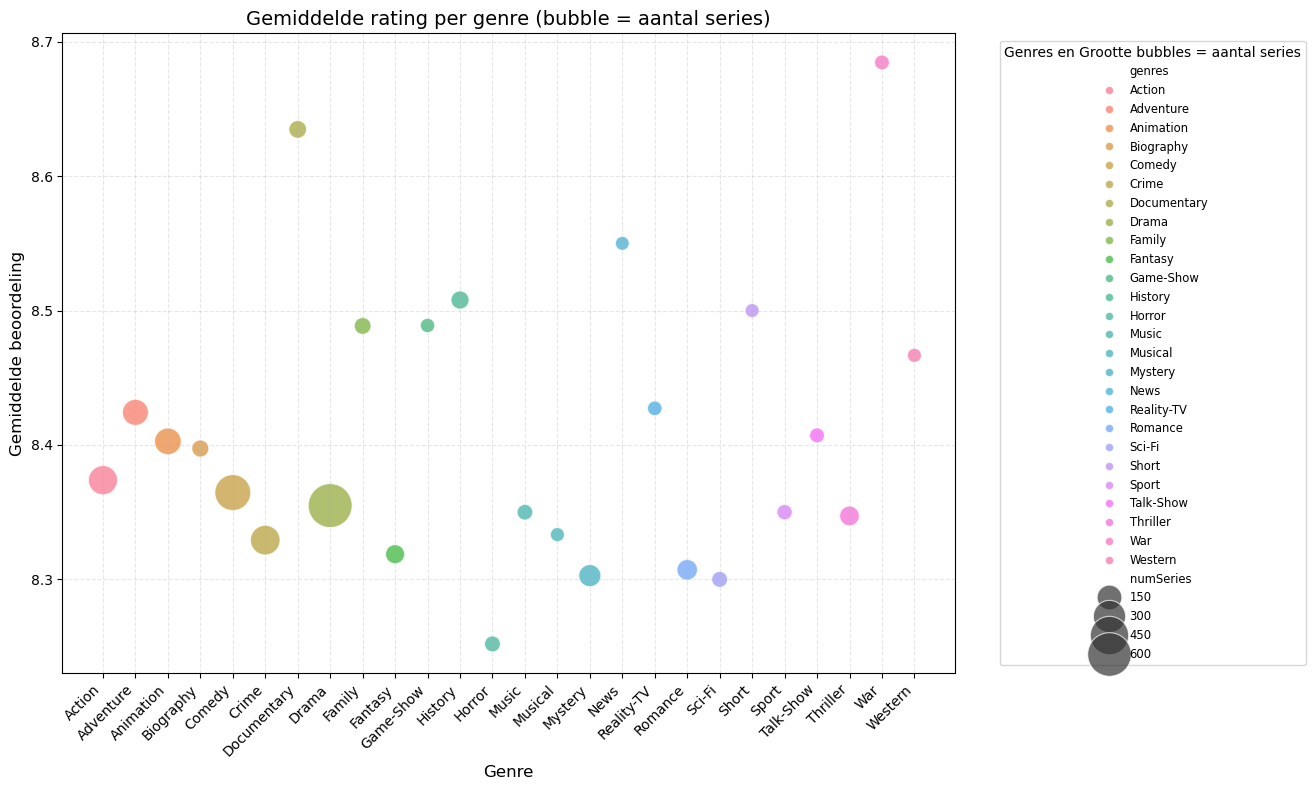

In [54]:
plt.figure(figsize=(12, 8))

# Bubble chart met seaborn
sns.scatterplot(
    data=genre_stats,
    x="genres",
    y="averageRating",
    size="numSeries",      # Bubble-grootte = aantal films
    sizes=(100, 1000),     # Min/max bubble-grootte (pas aan)
    hue="genres",          # Kleur op genre (optioneel)
    alpha=0.7,             # Doorzichtigheid
    legend="brief",         # Toon legenda    
)

plt.title("Gemiddelde rating per genre (bubble = aantal series)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Gemiddelde beoordeling", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Draai genre-labels voor leesbaarheid


plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.grid(axis="x", linestyle="--", alpha=0.3)


plt.legend(
    bbox_to_anchor=(1.05, 0.5),   # Rechts van het plot
    loc='center left',
    borderaxespad=0,
    title="Genres en " \
    "Grootte bubbles = aantal series",
    fontsize='small',
    title_fontsize='medium'
)


plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Zorg dat er ruimte is voor de legenda
plt.show()